In [29]:
%matplotlib inline
import numpy as np

data2=np.loadtxt('D:/number_recognizer/test15.txt')
target2=np.loadtxt('D:/number_recognizer/target15.txt')

print(data2.shape)
print(target2.shape)

data2[np.nonzero(data2 > 1)]=1

target2 = target2.astype(int)
data = data2
n_samples = len(target2)

(1299L, 64L)
(1299L,)


Optimal number of features : 42


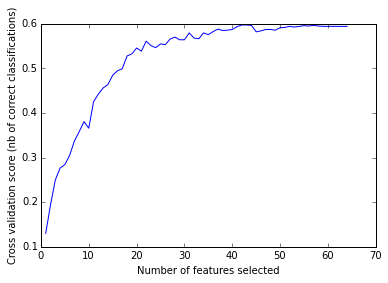

In [30]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Build a classification task using 3 informative features
X = data2
y = target2

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [28]:
from sklearn import metrics
expected = target2[n_samples / 3:]
predicted = rfecv.predict(data2[n_samples / 3:])



print("Classification report for classifier %s:\n%s\n"
    % (rfecv, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))



Classification report for classifier RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 2 ..., 0 8], n_folds=2, shuffle=False, random_state=None),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   estimator_params=None, scoring='accuracy', step=1, verbose=0):
             precision    recall  f1-score   support

          0       0.82      0.77      0.79       100
          1       0.81      0.91      0.86        81
          2       0.76      0.90      0.82        88
          3       0.81      0.77      0.79        95
          4       0.83      0.84      0.83        75
          5       0.84      0.74      0.79        82
          6       0.70      0.74      0.72        77
          7       0.75      0.75      0.75        87
          8       0.92      0.79      0.85        70
          9       0.84      0.83      0.8